In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
import re

df = pd.read_excel('/Users/vn93214/Downloads/Dec5th2023_Python/Exam Stress Final.xlsx', sheet_name=None)
grades=df['Grades']
demography=df['Demography']
eda=df['EDA']
hr=df['HR']
temp=df['Temp']
ibi=df['IBI']


# Q49. [ ""Python Hackthaon."",""December 2023."",""Numpy Ninja."" ]
# tokenise the Sentences and place it in single column"


In [2]:
df = pd.DataFrame({'Tokenise Sen': ['Python Hackthaon ''December 2023 ''Numpy Ninja']})
df = df.explode('Tokenise Sen')
print(df)

                                 Tokenise Sen
0  Python Hackthaon December 2023 Numpy Ninja


# Q50.Count the students who are in the Race group White

In [3]:
import pandas as pd
df = pd.read_excel('/Users/vn93214/Downloads/Dec5th2023_Python/Exam Stress Final.xlsx', sheet_name='Demography')
count = len(df[df['Race'] == 'White'])
print("Students in Race group white count is:", count)

Students in Race group white count is: 4


# Q51.Display the Youngest Student demographic details. with Avg Heart Rate

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import seaborn as sns
df = pd.read_excel('/Users/vn93214/Downloads/Dec5th2023_Python/Exam Stress Final.xlsx', sheet_name=None)
grades=df['Grades']
demography=df['Demography']
eda=df['EDA']
hr=df['HR']
temp=df['Temp']
ibi=df['IBI']
#DOB = pd.to_datetime(demography['DOB'], format='%m/%d/%Y')
#date_object = pd.to_datetime(demography['DOB'], origin='1900-01-01')

demography['Age'] = (pd.Timestamp.now() - demography['DOB']).astype('<m8[Y]')
youngest_student_index = demography['Age'].idxmin()

youngest_student_demographics = demography.loc[youngest_student_index]

youngest_student_hr_data = hr[hr['Student_id'] == youngest_student_demographics['Student_id']]

avg_heart_rate = youngest_student_hr_data['HR'].mean()

print("Youngest Student Demographic Details:")
print(youngest_student_demographics)
print(f"\nAverage Heart Rate: {avg_heart_rate}")

Youngest Student Demographic Details:
Student_id                    S07
DOB           2010-08-01 00:00:00
First Name                  Roger
Last Name               Frederick
Gender                          M
Race                      African
Age                          13.0
Name: 6, dtype: object

Average Heart Rate: 103.84210238429172


# Q52.Plot the Donut chart Student distrubution by Gender


F    5
M    5
Name: Gender, dtype: int64


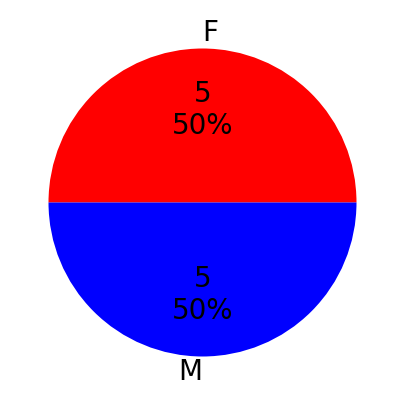

In [17]:
df = pd.read_excel('/Users/vn93214/Downloads/Dec5th2023_Python/Exam Stress Final.xlsx', sheet_name='Demography')
print(df['Gender'].value_counts())
def label_function(val):
    return f'{val / 100 * len(df):.0f}\n{val:.0f}%'

fig, ax1 = plt.subplots(ncols=1, figsize=(10, 5))

df.groupby('Gender').size().plot(kind='pie',autopct=label_function,textprops={'fontsize': 20},
                                  colors=['r', 'b'], ax=ax1)

plt.show()

# 53.Calculate the 'AGE' of the Student and Display with Student Name

In [5]:
from datetime import datetime
import io
import numpy as np
import pandas as pd
df = pd.read_excel('/Users/vn93214/Downloads/Dec5th2023_Python/Exam Stress Final.xlsx', sheet_name='Demography')
df['DOB'] = pd.to_datetime(df['DOB'])
current_date = datetime.now()
df['Age'] = (current_date - df['DOB']) // pd.Timedelta(days=365.25)
for index, row in df.iterrows():
    print(f"First Name: {row['First Name']} - Age: {row['Age']}")

First Name: Barbara - Age: 14
First Name: Nora - Age: 14
First Name: Gabriel - Age: 14
First Name: John - Age: 14
First Name: Jane - Age: 14
First Name: Pat - Age: 15
First Name: Roger - Age: 13
First Name: John - Age: 14
First Name: Paul - Age: 14
First Name: Janice - Age: 14


# Q54.np.arange(1,31).reshape(6,5),find array slicing to get the elements 4,5,24,25,29,30.

In [7]:
arr = np.arange(1, 31).reshape(6, 5)
result = arr[[1, 1, 4, 4, 5, 5], [0, 1, 3, 4, 0, 1]]
print("Result is:",result)

Result is: [ 6  7 24 25 26 27]


# Q55.Display the Mean Heart Rate who scored least grade in final

In [9]:
merged_df = pd.merge(hr, grades, on='Student_id')
merged_df = pd.merge(merged_df, demography, on='Student_id')
# Find the student who scored the least in Finals
least_scored_student = merged_df.loc[merged_df['final'].idxmin()]
# Get the heart rate of the least scored student
least_scored_hr = least_scored_student['HR']
mean_heart_rate_least_scored = merged_df[merged_df['Student_id'] == least_scored_student['Student_id']]['HR'].mean()

print(f"Mean heart rate of the student who scored the least grade in Finals: {mean_heart_rate_least_scored}")

Mean heart rate of the student who scored the least grade in Finals: 103.84210238429172


# Q56.Input the Lastname of the Student and Based on the gender concatinate 'MR' or 'MS' to the Full Name

In [10]:
input_last_name = input("Enter the last name of the student: ")

# Find the gender for the input last name
gender = demography.loc[demography['Last Name'] == input_last_name, 'Gender'].values[0]
# Concatenate 'MR' or 'MS' based on gender
title = 'MR' if gender == 'M' else 'MS'

# Get the full name
full_name = demography.loc[demography['Last Name'] == input_last_name, 'First Name'].values[0]

# Concatenate 'MR' or 'MS' to the full name
full_name_with_title = f"{title}. {full_name} {input_last_name}"
print(f"The full name with title for {input_last_name}: {full_name_with_title}")

Enter the last name of the student: Doe
The full name with title for Doe: MR. John Doe


# Q57.Give Distrubution chart of MAX EDA of the midterm1

Maximum EDA score from the EDA : 5.795


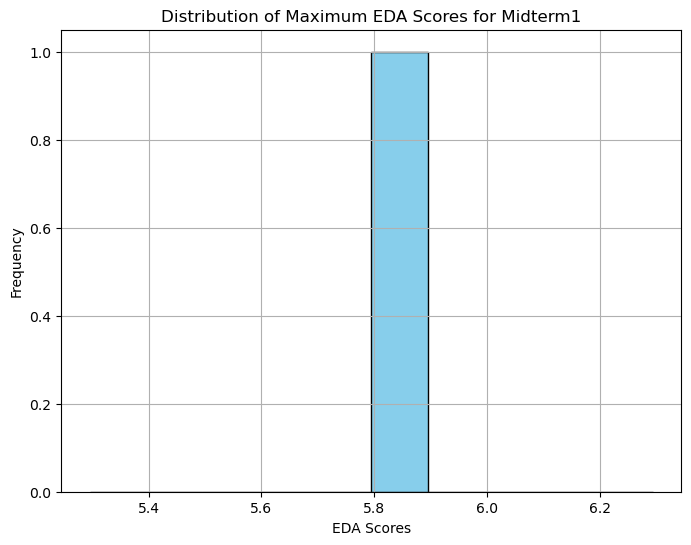

In [16]:
max_eda = eda['EDA'].max()

print("Maximum EDA score from the EDA :", max_eda)
plt.figure(figsize=(8, 6))
plt.hist(max_eda, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Maximum EDA Scores for Midterm1')
plt.xlabel('EDA Scores')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Q58.Count the students based on Genderwise using count plot


Text(0, 0.5, 'Count')

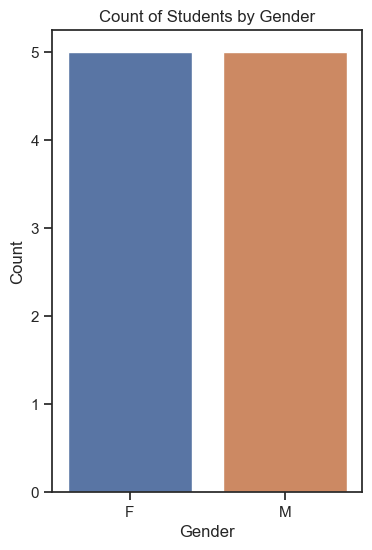

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
plt.figure(figsize=(4, 6))
sns.countplot(data=df, x='Gender')
plt.title('Count of Students by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Q59.Display full name of Student who are born in year '2010'

In [11]:
demography['DOB'] = pd.to_datetime(demography['DOB'])

born_2010 = demography[demography['DOB'].dt.year == 2010]

full_names_2010 = born_2010['First Name'] + ' ' + born_2010['Last Name']

print("Full names of students born in the year 2010:")
print(full_names_2010) 

Full names of students born in the year 2010:
6    Roger Frederick
dtype: object


# Q60."[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]  In the Array,find array slicing for elements 2,8,14,20."

In [5]:
import numpy as np
arr = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10],
                [11, 12, 13, 14, 15],
                [16, 17, 18, 19, 20],
                [21, 22, 23, 24, 25],
                [26, 27, 28, 29, 30]])

result = arr[[0, 1, 2, 3], [1, 2, 3, 4]]
print(result)

[ 2  8 14 20]


# Q61.Create a dataframe with Max EDA and Mean HR as the indices and the count of number of records per student as the value.

In [13]:
eda = pd.DataFrame(eda)
hr = pd.DataFrame(hr)

merged_df = pd.merge(eda, hr, on='Student_id')
summary_df = merged_df.groupby('Student_id').agg({'EDA': 'max', 'HR': 'mean'}).reset_index()
print(summary_df)

# Group by 'Max EDA' and 'Mean HR', count records per student
result = summary_df.groupby(['EDA', 'HR']).size().reset_index(name='Count')

# Set 'Max EDA' and 'Mean HR' as indices
result.set_index(['EDA', 'HR'], inplace=True)
print(result)

  Student_id    EDA          HR
0        S01  2.198  106.522138
1       S010  1.423  106.231091
2        S02  1.311  114.313813
3        S03  1.651  103.283502
4        S04  5.795   98.399456
5        S05  1.611  104.806015
6        S06  2.184  104.793488
7        S07  1.485  103.842102
8        S08  2.920  105.475896
9        S09  2.756   98.802752
                  Count
EDA   HR               
1.311 114.313813      1
1.423 106.231091      1
1.485 103.842102      1
1.611 104.806015      1
1.651 103.283502      1
2.184 104.793488      1
2.198 106.522138      1
2.756 98.802752       1
2.920 105.475896      1
5.795 98.399456       1


# Q62.Print the Last name like below ouptput eg:.Last Name and count of Last Name Occurance :
Counter({'Doe': 2, 'Walters': 1, 'Jones': 1, 'Willows': 1, 'Murray': 1, 'Frederick': 1, 'Wills': 1, 'Cartney': 1, 'Smith': 1})"

In [14]:
last_name_counts = demography['Last Name'].value_counts()

# Display last name and count of last name
print("Last Name and count of Last Name Occurrence:")
print(last_name_counts)

Last Name and count of Last Name Occurrence:
Doe          2
Walters      1
Jones        1
Willows      1
Murray       1
Frederick    1
Wills        1
Cartney      1
Smith        1
Name: Last Name, dtype: int64


# Q63.Retrieve the row with minimum EDA using sorting technique.

In [25]:
sorted_df = eda.sort_values(by='EDA')
# Retrieve the row with minimum 'EDA'
row_with_min_EDA = sorted_df.iloc[0]
print("Row with minimum EDA:")
print(row_with_min_EDA)

Row with minimum EDA:
EDA                   0.0
Time in mins          166
Student_id            S06
Exam            midterm 2
Name: 4499, dtype: object


# Q64.get the last letter of last name of students using RegEX

In [15]:
import re
demography['Last_Letter'] = demography['Last Name'].apply(lambda x: re.findall(r'(\w)\b', x)[0])

print(demography['Last_Letter'])

0    s
1    s
2    s
3    e
4    e
5    y
6    k
7    s
8    y
9    h
Name: Last_Letter, dtype: object
